Cho tập dữ liệu Wine Quality 


In [115]:
# 1. Đọc dữ liệu, sau đó hiển thị 5 dòng đầu tiên và thông tin về dữ liệu, thống kê mô tả.
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

data = pd.read_csv('winequality-red.csv', sep=';')

In [145]:
# Xem 5 dòng đầu tiên
print(data.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [119]:
# Kiểm tra thông tin dữ liệu
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [121]:
# Thống kê mô tả
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [105]:
# 2. Phân tích khám phá dữ liệu 

In [123]:
# 2.1 Kiểm tra giá trị thiếu
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


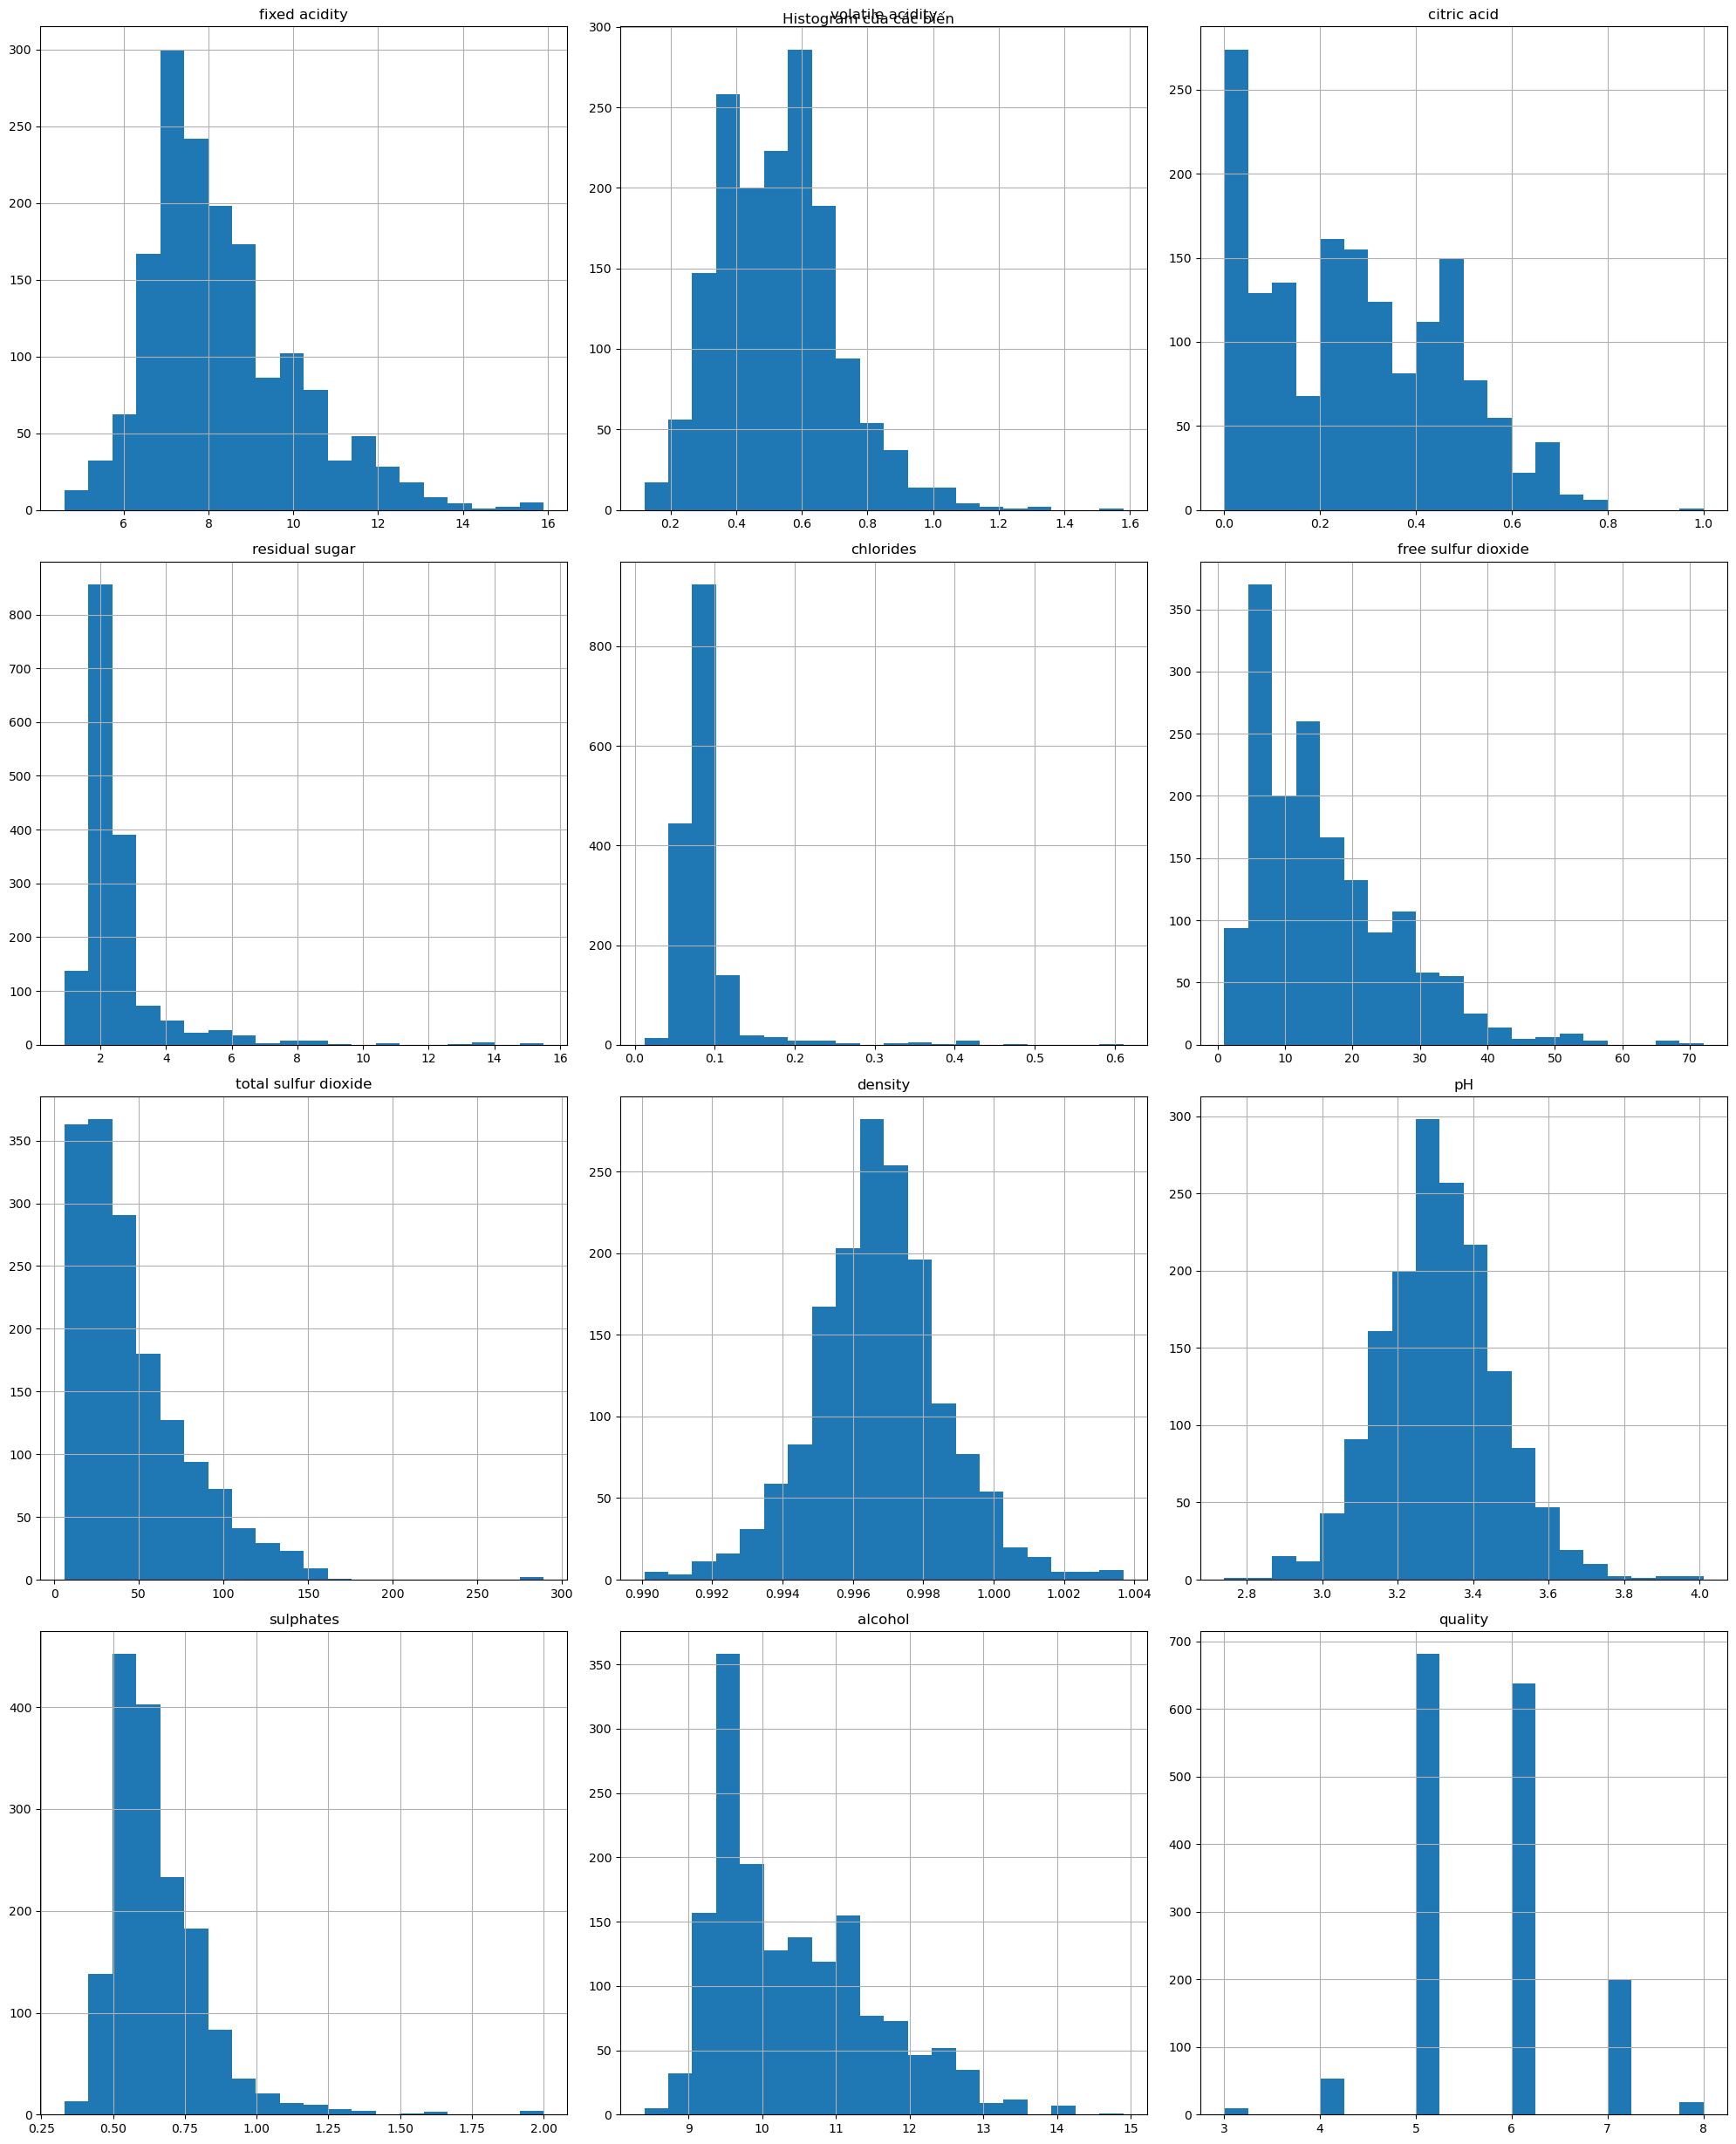

In [127]:
# 2.2 Vẽ histogram cho tất cả các biến và nhận xét 
data.hist(figsize=(20, 25), bins=20)
plt.suptitle("Histogram của các biến")
plt.tight_layout()
plt.show()

# Nhận xét: 

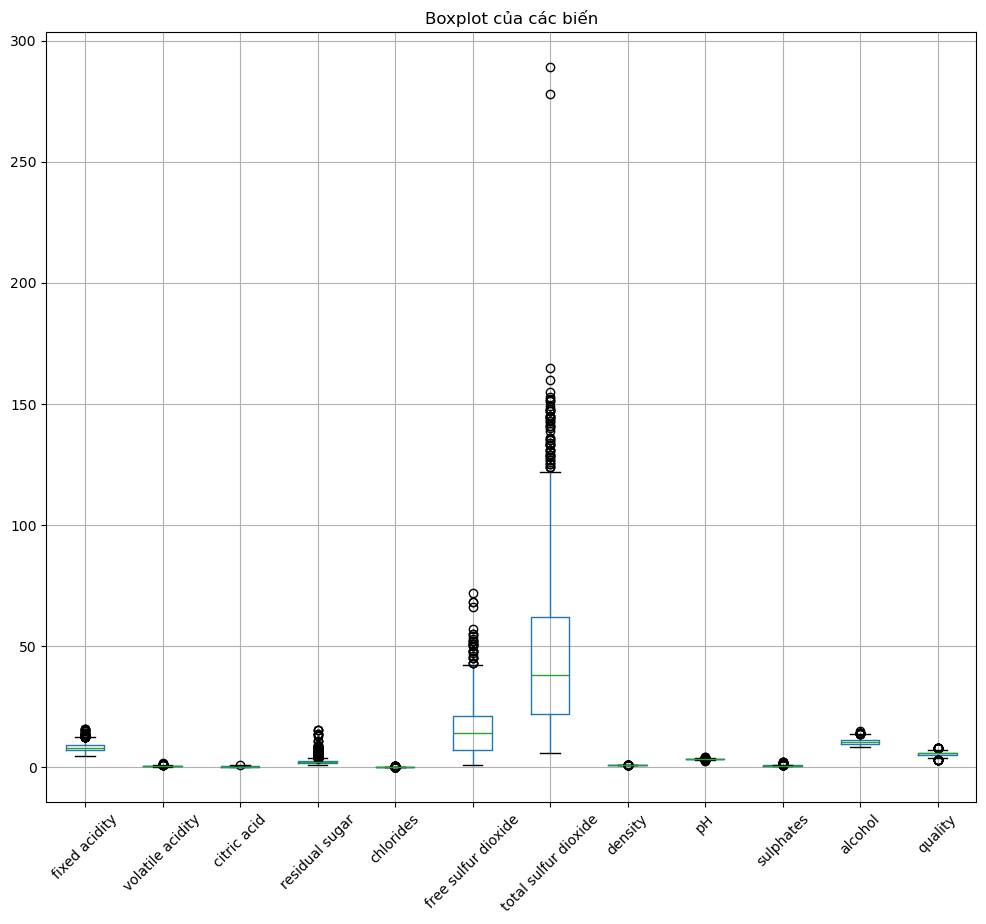

In [125]:
# 2.3 Vẽ boxplot cho tất cả các biến và nhận xét 
plt.figure(figsize=(12, 10))
data.boxplot(rot=45)  # Xoay nhãn trục x để dễ đọc
plt.title("Boxplot của các biến")
plt.show()

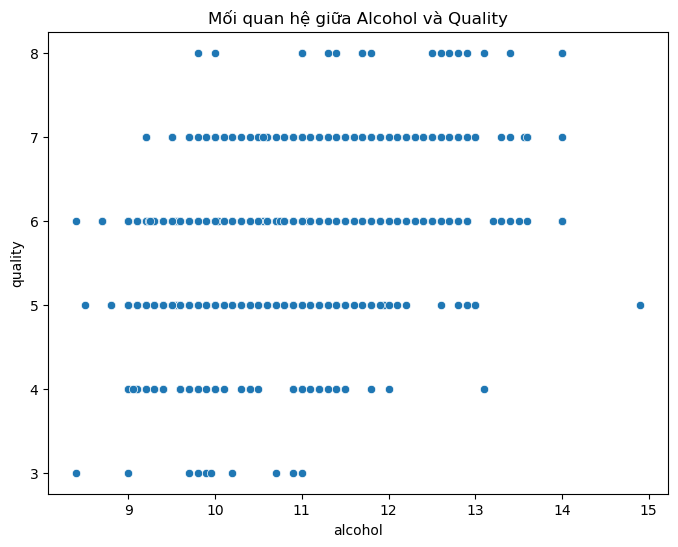

In [129]:
# 2.4 Vẽ Scatterplot cho "alcohol" và "quality"
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["alcohol"], y=data["quality"])
plt.title("Mối quan hệ giữa Alcohol và Quality")
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.show()

In [133]:
# 3. Tính toán ma trận tương quan và vẽ heat map của ma trận tương quan

In [141]:
# Tính toán ma trận tương quan
corr_matrix = data.corr()
# Hiển thị ma trận tương quan
print("\nMa trận tương quan:")
print(corr_matrix)


Ma trận tương quan:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide

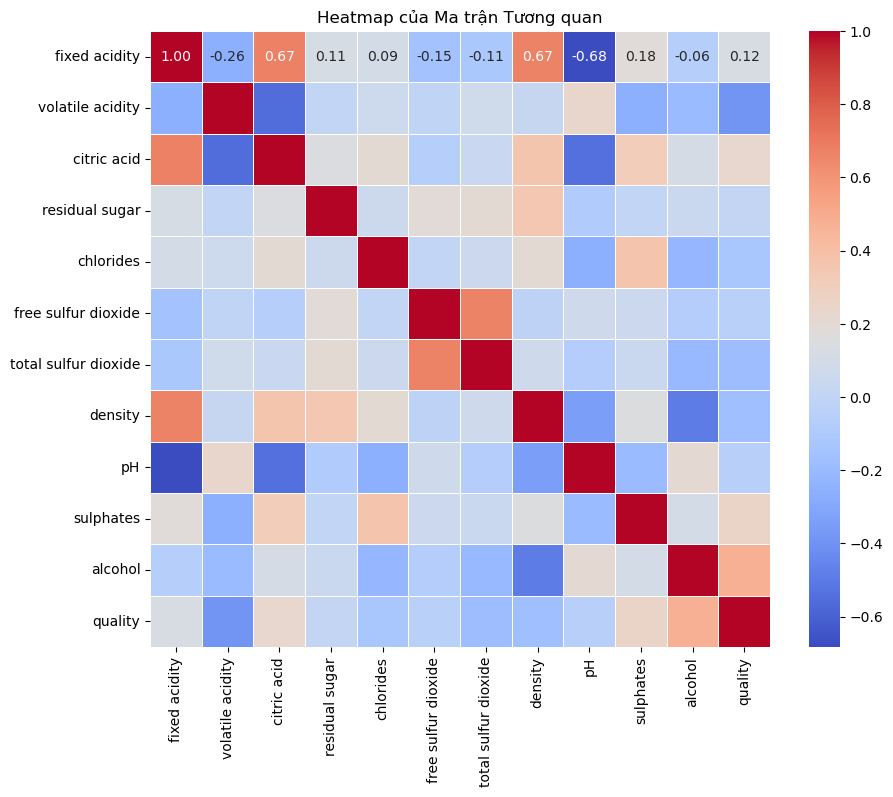

In [143]:
# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap của Ma trận Tương quan")
plt.show()

In [147]:
# 4. Chia tập dữ liệu thủ công không dùng thư viên có sẵn

In [169]:
# 4.1 Xáo trộn dữ liệu
xao_data = data.sample(frac=1, random_state=42).reset_index(drop=True)
xao_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.49,0.20,2.6,0.332,8.0,14.0,0.99680,3.21,0.90,10.5,6
1,6.6,0.52,0.04,2.2,0.069,8.0,15.0,0.99560,3.40,0.63,9.4,6
2,7.4,0.53,0.12,1.9,0.165,4.0,12.0,0.99702,3.26,0.86,9.2,5
3,7.3,0.69,0.32,2.2,0.069,35.0,104.0,0.99632,3.33,0.51,9.5,5
4,11.4,0.60,0.49,2.7,0.085,10.0,41.0,0.99940,3.15,0.63,10.5,6


In [151]:
# 4.2 Chia dữ liệu với 80% train và 20% test
train_size = int(0.8 * len(data))  # Tính số lượng mẫu cho tập train

train_data = data[:train_size]  # Lấy 80% dữ liệu đầu tiên làm train
test_data = data[train_size:]   # Lấy 20% dữ liệu còn lại làm test

In [153]:
# 4.3 Tách dữ liệu
print(f"Số lượng mẫu tập huấn luyện: {len(train_data)}")
print(f"Số lượng mẫu tập kiểm tra: {len(test_data)}")

Số lượng mẫu tập huấn luyện: 1279
Số lượng mẫu tập kiểm tra: 320


In [157]:
# 4.4 Tách đặc trưng và nhãn 
X_train = train_data.drop(columns=['quality'])  # Đặc trưng tập train
y_train = train_data['quality']                # Nhãn tập train

X_test = test_data.drop(columns=['quality'])   # Đặc trưng tập test
y_test = test_data['quality'] 

# Kiểm tra kích thước của các tập dữ liệu
print(f"\nKích thước X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Kích thước X_test: {X_test.shape}, y_test: {y_test.shape}")


Kích thước X_train: (1279, 11), y_train: (1279,)
Kích thước X_test: (320, 11), y_test: (320,)


In [171]:
# 5. Chuẩn bị dữ liệu

In [209]:
# 5.1 Khởi tạo bộ dữ liệu chuẩn hóa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X = data.drop(columns=['quality']) 
y = data['quality']                

# Chia dữ liệu thành tập huấn luyện (80%) và kiểm tra (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Khởi tạo bộ chuẩn hóa
scaler = StandardScaler()

In [211]:
# 5.2 Chuẩn hóa huấn luyện
X_train_scaled = scaler.fit_transform(X_train)

In [213]:
# 5.3 Chuẩn hóa kiểm tra
X_test_scaled = scaler.fit_transform(X_test)

In [16]:
# 6. Ứng dụng mô hình hồi quy tuyến tính 

In [215]:
# 6.1 khởi tạo
from sklearn.linear_model import LinearRegression

# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

In [219]:
# 6.2 Huấn luyện
model.fit(X_train_scaled, y_train)

LinearRegression()

In [221]:
# 6.3 Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

In [223]:
# 7. Đánh giá mô hình, tính MSE và R^2
from sklearn.metrics import mean_squared_error, r2_score

# Tính toán Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Tính toán R² Score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 0.4026
R² Score: 0.3796


### Bài tập về nhà:


In [226]:
# 1. Hoàn thành bài tập ở trên sao cho đoạn code có thể chạy mượt mà và chính xác

In [228]:
# 2. Cho bộ dữ liệu sau: howlongwelive 

In [1]:
# 2.1 In ra trong bộ dl có bao nhiêu cột và bao nhiêu hàng 
import pandas as pd

df = pd.read_csv("howlongwelive.csv")

num_rows, num_cols = df.shape
print(f"Số hàng: {num_rows}, Số cột: {num_cols}")

Số hàng: 2938, Số cột: 22


In [3]:
# 2.2 In danh sách tên của các cột
print("Danh sách tên các cột:", df.columns.tolist())

Danh sách tên các cột: ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [7]:
# 2.3 Thử dùng df['status'] 
print(df['Status'])

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2933    Developing
2934    Developing
2935    Developing
2936    Developing
2937    Developing
Name: Status, Length: 2938, dtype: object


In [11]:
# 2.4 Cho tôi biết có bao nhiêu nước đang phát triển và bao nhiêu nước phát triển 
num_developing = (df['Status'] == 'Developing').sum()
num_developed = (df['Status'] == 'Developed').sum()

print(f"Số nước đang phát triển: {num_developing}")
print(f"Số nước phát triển: {num_developed}")


Số nước đang phát triển: 2426
Số nước phát triển: 512


In [13]:
# 2.5 Tính min, max, mean, median của alcohol
min_alcohol = df['Alcohol'].min()
max_alcohol = df['Alcohol'].max()
mean_alcohol = df['Alcohol'].mean()
median_alcohol = df['Alcohol'].median()

print(f"Min: {min_alcohol}, Max: {max_alcohol}, Mean: {mean_alcohol}, Median: {median_alcohol}")


Min: 0.01, Max: 17.87, Mean: 4.602860787172012, Median: 3.755


In [17]:
# 2.6 
    #BT1: Đếm những hàng có rượu nhiều hơn mức trung bình và liệt kê những quốc gia độc đáo này
alcohol_mean = df['Alcohol'].mean()

high_alcohol_df = df[df['Alcohol'] > alcohol_mean]

unique_countries = high_alcohol_df['Country'].unique()
print(f"Số hàng có mức rượu cao hơn trung bình: {len(high_alcohol_df)}")
print("Danh sách các quốc gia có mức tiêu thụ rượu cao hơn trung bình:")
print(unique_countries)


Số hàng có mức rượu cao hơn trung bình: 1171
Danh sách các quốc gia có mức tiêu thụ rượu cao hơn trung bình:
['Albania' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Australia'
 'Austria' 'Bahamas' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cameroon' 'Canada' 'Chile' 'China' 'Colombia'
 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Dominican Republic'
 'Equatorial Guinea' 'Estonia' 'Finland' 'France' 'Gabon' 'Georgia'
 'Germany' 'Greece' 'Grenada' 'Guyana' 'Haiti' 'Hungary' 'Iceland'
 'Ireland' 'Italy' 'Japan' 'Kazakhstan' "Lao People's Democratic Republic"
 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Mexico' 'Mongolia'
 'Montenegro' 'Namibia' 'Netherlands' 'New Zealand' 'Nigeria' 'Norway'
 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Republic of Korea' 'Republic of Moldova' 'Romania' 'Russian Federation'
 'Rwanda' 'Saint Kitts and Nevis' 'Saint Lucia'
 'Saint Vincent and the Grenadin

In [28]:
     #BT2: Lấy danh sách các quốc gia có trình độ học vấn cao hơn mức trung bình và GDP cao hơn mức trung bình
gdp_mean = df['GDP'].mean()
schooling_mean = df['Schooling'].mean()

high_gdp_schooling_countries = df[(df['GDP'] > gdp_mean) & (df['Schooling'] > schooling_mean)]['Country'].unique()

print(f"\nSố nước có GDP và trình độ học vấn cao hơn trung bình: {len(high_gdp_schooling_countries)}")
print("Danh sách các nước này:")
print(high_gdp_schooling_countries)


Số nước có GDP và trình độ học vấn cao hơn trung bình: 69
Danh sách các nước này:
['Antigua and Barbuda' 'Argentina' 'Australia' 'Austria' 'Azerbaijan'
 'Bahrain' 'Barbados' 'Belarus' 'Belgium' 'Botswana' 'Brazil'
 'Brunei Darussalam' 'Bulgaria' 'Canada' 'Chile' 'China' 'Colombia'
 'Costa Rica' 'Croatia' 'Cyprus' 'Denmark' 'Estonia' 'Finland' 'France'
 'Gabon' 'Germany' 'Greece' 'Grenada' 'Hungary' 'Iceland' 'Ireland'
 'Israel' 'Italy' 'Japan' 'Kazakhstan' 'Kuwait' 'Latvia' 'Lebanon' 'Libya'
 'Lithuania' 'Luxembourg' 'Malaysia' 'Maldives' 'Malta' 'Mauritius'
 'Mexico' 'Netherlands' 'New Zealand' 'Norway' 'Oman' 'Panama' 'Poland'
 'Portugal' 'Qatar' 'Romania' 'Russian Federation' 'Saudi Arabia'
 'Seychelles' 'Singapore' 'Slovenia' 'South Africa' 'Spain' 'Suriname'
 'Sweden' 'Switzerland' 'Trinidad and Tobago' 'Turkey'
 'United Arab Emirates' 'Uruguay']
